In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import approx_fprime
from scipy.optimize import minimize
import statistics
from scipy import linalg
from scipy.spatial import distance
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [34]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [105]:
for i in range(len(raitings)):
    rez = distance.cosine(raitings[i],raitings[i+1])
    print(f'пользователь {i+1} близок по косинусному расстоянию к пользователю {i+2} = {rez}')
    if i == 8:
        break
    

пользователь 1 близок по косинусному расстоянию к пользователю 2 = 0.17397080850739877
пользователь 2 близок по косинусному расстоянию к пользователю 3 = 0.18765675056922038
пользователь 3 близок по косинусному расстоянию к пользователю 4 = 0.15330626007141468
пользователь 4 близок по косинусному расстоянию к пользователю 5 = 0.30846591127663514
пользователь 5 близок по косинусному расстоянию к пользователю 6 = 0.22355659756192348
пользователь 6 близок по косинусному расстоянию к пользователю 7 = 0.2598819922325061
пользователь 7 близок по косинусному расстоянию к пользователю 8 = 0.17330826405704924
пользователь 8 близок по косинусному расстоянию к пользователю 9 = 0.20187239785247235
пользователь 9 близок по косинусному расстоянию к пользователю 10 = 0.0990620251313099


Больше всего схожи ==> пользователь 4 близок по косинусному расстоянию к пользователю 5 = 0.30846591127663514

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [114]:
X = np.resize(raitings, (10, 15))
U, d, Vt = linalg.svd(X)
D = linalg.diagsvd(d, X.shape[0], X.shape[1])
D

array([[73.97894988,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 15.90026986,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 14.76407467,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 12.59396914,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 11.97537142,
         0.        ,  0.        ,  0.        , 

In [113]:
X = np.resize(raitings, (10, 5))
U, d, Vt = linalg.svd(X)
D = linalg.diagsvd(d, X.shape[0], X.shape[1])
D

array([[43.67880803,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 11.25732979,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  8.90828058,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  7.0708231 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  5.00801888],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [35]:
def fu(x):
    return np.tan(np.sin(x[0]) + np.cos(2*x[0] + 3))**2
x = [1]
eps = np.sqrt(np.finfo(float).eps)
print(f'Производная функции в точке x = 1 равна {approx_fprime(x, fu, [eps, eps])[0]}')

Производная функции в точке x = 1 равна 55.38592439889908


### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [36]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [37]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [38]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

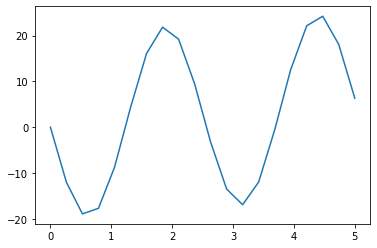

In [39]:
plt.plot(x, fx)
plt.show()

In [71]:
#x0 = np.array[(-5, 5)]
rez = minimize(f, [-5,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

TypeError: f() missing 2 required positional arguments: 'a' and 'b'

In [55]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [41]:
error([0.5,0.7])

246.03671399310974

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [42]:
elements = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
probabilities = [0.05, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.03, 0.1, 0.1, 0.05, 0.05, 0.05, 0.01, 0.01, 0.01 ,0.01 ,0.01 ,0.01, 0.01 ]
gist = []

for i in range(1000):
    rez = np.random.choice(elements, 50, p=probabilities)
    sum_rez = sum(rez)
    num_rez = len(rez)
    avg_rez = sum_rez/num_rez
    gist.append(avg_rez)
    print(rez)
    print(avg_rez)
gist

[11  3  9 10  1  1  6  8 18  5  5 10  6  9  4  3  1  2  6  2 10  5  9 13
  2 12 10 12  9  7 11  3 10  6  6  1  2  6  1  1  7 10 12  6 11  3 11  6
 11  5]
6.76
[ 2  6  5 10  5 10  2  9  8  2  6  2 17  6  5  1  9  2  9  5  6  5  2  3
  2  9  1  5  4  8  2  7  6 10  1 10  7  1  6 11  3  2  2  5 18 15  2  6
  3 12]
5.9
[ 6  5  2 13 17  2  1 20  1  6  6 17  9  1 15  9 13 12  9  7 12  6  9  6
  7  3  8 12  6 10 10  5  9  2  2  7 10 13  3  9  3  6 11  9  2  5  3 10
  9  5]
7.66
[ 1  7  6  1  7  3 14  1  2  5 10  3  3  3 11 19  5  5  8 10  3  2  4  4
  7  1  2 13  6 12  9  5 10  9 11 14  6  3 13 12 16  9  3  3  7 11  9 10
  9  2]
6.98
[17 10 11 20 11  2  9  6  9 13 13 18  1  6  3  5  6  3 18  5  3 12 12  3
  6 13 13  7  6  2 12  5 11 10 11 19  3 10  5  2  8  5 10  6 12  6  1  2
  2  3]
8.12
[12  1 12  6  2  5 12  3 13  6 16  1  6  7 14  5  2  4  1 11 16  8  2  1
  7  9 13  6  6 12  6  2  1  6 17 15  7 12  1  4 11 13  4 18 10  3 11  4
  6  5]
7.5
[ 3  4  1 11  7  7  4  2  2  4  5 10  6 10  8  3

[6.76,
 5.9,
 7.66,
 6.98,
 8.12,
 7.5,
 6.2,
 8.06,
 8.02,
 6.46,
 7.36,
 7.72,
 6.56,
 7.28,
 6.58,
 7.1,
 6.32,
 7.66,
 7.22,
 7.6,
 8.46,
 5.96,
 5.68,
 7.36,
 7.94,
 6.28,
 7.94,
 6.52,
 7.46,
 7.4,
 6.3,
 6.74,
 6.94,
 7.58,
 7.38,
 6.68,
 7.54,
 7.64,
 7.08,
 8.14,
 7.64,
 7.54,
 6.78,
 7.18,
 7.88,
 6.58,
 7.12,
 7.92,
 8.06,
 8.82,
 7.62,
 7.72,
 7.88,
 7.32,
 5.5,
 6.6,
 7.54,
 6.82,
 7.8,
 8.08,
 7.58,
 7.1,
 7.54,
 8.12,
 6.66,
 7.06,
 7.0,
 7.34,
 7.44,
 7.46,
 8.28,
 7.18,
 6.68,
 7.28,
 6.76,
 7.26,
 7.92,
 6.82,
 7.42,
 7.04,
 6.66,
 6.24,
 6.92,
 7.64,
 7.32,
 5.98,
 8.16,
 7.08,
 7.18,
 7.44,
 8.78,
 7.78,
 7.08,
 7.28,
 6.9,
 8.44,
 7.76,
 6.64,
 7.64,
 8.64,
 7.66,
 8.02,
 6.38,
 6.14,
 7.04,
 6.64,
 7.04,
 6.76,
 7.68,
 8.08,
 7.62,
 6.98,
 8.38,
 6.88,
 7.7,
 6.58,
 6.46,
 6.38,
 8.16,
 6.74,
 7.48,
 7.6,
 7.18,
 7.06,
 7.26,
 7.72,
 7.8,
 7.04,
 7.72,
 7.88,
 8.14,
 7.1,
 8.04,
 7.54,
 6.48,
 6.78,
 6.82,
 8.02,
 7.08,
 7.3,
 7.36,
 7.58,
 7.36,
 6.84,
 6.96,
 7.

No handles with labels found to put in legend.


Text(0.5, 0, '$x$')

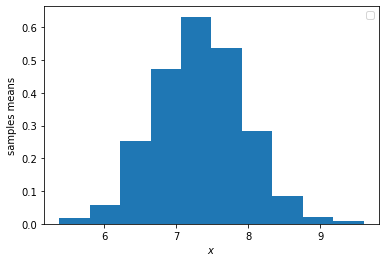

In [43]:
plt.hist(gist, density=True)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [50]:
a = np.array([[1, 4], [1, 1]])
w, v = np.linalg.eig(a)

In [51]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [0.4472136 0.4472136]
